<a href="https://colab.research.google.com/github/jb-seba/Spotify_TCS/blob/main/TCS_Music_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install matplotlib
import matplotlib.pyplot as plt


!pip install pandas
import pandas as pd


!pip install numpy
import numpy as np

!pip install seaborn
import seaborn as sns

!pip install scikit-learn
from sklearn import datasets, model_selection
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_regression

import warnings
warnings.filterwarnings('ignore')

In [4]:
from google.colab import files
uploaded = files.upload()
file_path = "/content/spotify-2023.csv"
df=pd.read_csv(file_path, encoding='latin-1')
df.head(10)

Saving spotify-2023.csv to spotify-2023 (1).csv


,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
5,Sprinter,"Dave, Central Cee",2,2023,6,1,2186,91,183706234,67,...,141,C#,Major,92,66,58,19,0,8,24
6,Ella Baila Sola,"Eslabon Armado, Peso Pluma",2,2023,3,16,3090,50,725980112,34,...,148,F,Minor,67,83,76,48,0,8,3
7,Columbia,Quevedo,1,2023,7,7,714,43,58149378,25,...,100,F,Major,67,26,71,37,0,11,4
8,fukumean,Gunna,1,2023,5,15,1096,83,95217315,60,...,130,C#,Minor,85,22,62,12,0,28,9
9,La Bebe - Remix,"Peso Pluma, Yng Lvcas",2,2023,3,17,2953,44,553634067,49,...,170,D,Minor,81,56,48,21,0,8,33


#Subsetting data

In [5]:
months_df = df.sort_values(by='released_month')
months_df.head(10)
months_df

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
483,Deck The Hall - Remastered 1999,Nat King Cole,1,1959,1,1,3299,0,127027715,65,...,107,F#,Minor,69,96,36,81,0,8,4
511,Less Than Zero,The Weeknd,1,2022,1,7,2800,0,200660871,18,...,143,NaN,Major,53,50,79,0,0,8,3
509,Gasoline,The Weeknd,1,2022,1,7,2297,0,116903579,11,...,123,F#,Minor,74,35,73,0,0,21,5
508,How Do I Make You Love Me?,The Weeknd,1,2022,1,7,1915,0,119238316,7,...,121,G,Minor,80,62,51,2,0,9,8
503,Fingers Crossed,"Lauren Spencer Smith, Lauren Spencer Smith, La...",3,2022,1,5,2235,0,349585590,65,...,109,F,Major,60,45,47,62,0,31,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
468,Open Arms (feat. Travis Scott),"SZA, Travis Scott",2,2022,12,8,1420,4,155653938,13,...,78,A,Major,67,22,59,76,1,15,16
493,Too Late,SZA,1,2022,12,8,714,0,49262961,0,...,128,B,Major,45,35,68,78,0,39,8
481,Raindrops (Insane) [with Travis Scott],"Travis Scott, Metro Boomin",2,2022,12,2,880,0,110649992,3,...,112,G#,Major,80,15,54,9,0,38,5
484,Smoking on my Ex Pack,SZA,1,2022,12,9,811,0,57144458,6,...,81,G#,Major,47,33,68,24,0,22,38


In [57]:
# converting mode values to numerical
mode_mapping = {'Major': 'Major', 'Minor': 'Minor'}
months_df['mode'] = df['mode'].map(mode_mapping)
months_df['bpm'].unique()
months_df['streams'].unique()
# converting streams values to numerical
months_df['streams'] = pd.to_numeric(months_df['streams'], errors='coerce')
df["streams"] = pd.to_numeric(df["streams"], errors='coerce')
months_df["streams"].unique()
months_df.groupby('released_month')[['bpm', 'mode', 'streams']].mean()
months_df.groupby('released_month')['mode'].unique()
mode_mapping = {'Major': 'Major', 'Minor': 'Minor'}
months_df['mode'] = df['mode'].map(mode_mapping)
months_df.head(10)
mode_mapping = {'Major': 'Major', 'Minor': 'Minor'}
months_df['mode'] = df['mode'].map(mode_mapping)
df["mode"] = df["mode"].map(mode_mapping)
months_df.groupby('released_month')[['bpm', 'mode', 'streams']].mean()


,bpm,mode,streams
released_month,,,
1,124.500000,NaN,7.275061e+08
2,124.672131,NaN,3.531535e+08
3,119.534884,NaN,4.770526e+08
4,125.803030,NaN,4.041460e+08
5,125.015625,NaN,4.156691e+08
6,122.197674,NaN,4.100447e+08
7,117.000000,NaN,4.821765e+08
8,123.391304,NaN,6.312657e+08
9,123.607143,NaN,7.346444e+08


Encoding mode column to convert to numerical values

In [61]:
from google.colab import files
uploaded = files.upload()
file_path = "/content/spotify-2023.csv"
new_df=pd.read_csv(file_path, encoding='latin-1')
new_df.head(10)
modes_encoded = pd.get_dummies(new_df, columns=['mode'])



Saving spotify-2023.csv to spotify-2023 (3).csv


In [63]:
modes_encoded = pd.get_dummies(new_df, columns=['mode'])
modes_encoded.head(10)

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,key,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,mode_Major,mode_Minor
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,B,80,89,83,31,0,8,4,True,False
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,C#,71,61,74,7,0,10,4,True,False
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,F,51,32,53,17,0,31,6,True,False
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,A,55,58,72,11,0,11,15,True,False
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,A,65,23,80,14,63,11,6,False,True
5,Sprinter,"Dave, Central Cee",2,2023,6,1,2186,91,183706234,67,...,C#,92,66,58,19,0,8,24,True,False
6,Ella Baila Sola,"Eslabon Armado, Peso Pluma",2,2023,3,16,3090,50,725980112,34,...,F,67,83,76,48,0,8,3,False,True
7,Columbia,Quevedo,1,2023,7,7,714,43,58149378,25,...,F,67,26,71,37,0,11,4,True,False
8,fukumean,Gunna,1,2023,5,15,1096,83,95217315,60,...,C#,85,22,62,12,0,28,9,False,True
9,La Bebe - Remix,"Peso Pluma, Yng Lvcas",2,2023,3,17,2953,44,553634067,49,...,D,81,56,48,21,0,8,33,False,True


In [64]:
new_months_df=modes_encoded.sort_values(by='released_month')
new_months_df.head(10)

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,key,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,mode_Major,mode_Minor
483,Deck The Hall - Remastered 1999,Nat King Cole,1,1959,1,1,3299,0,127027715,65,...,F#,69,96,36,81,0,8,4,False,True
511,Less Than Zero,The Weeknd,1,2022,1,7,2800,0,200660871,18,...,NaN,53,50,79,0,0,8,3,True,False
509,Gasoline,The Weeknd,1,2022,1,7,2297,0,116903579,11,...,F#,74,35,73,0,0,21,5,False,True
508,How Do I Make You Love Me?,The Weeknd,1,2022,1,7,1915,0,119238316,7,...,G,80,62,51,2,0,9,8,False,True
503,Fingers Crossed,"Lauren Spencer Smith, Lauren Spencer Smith, La...",3,2022,1,5,2235,0,349585590,65,...,F,60,45,47,62,0,31,5,True,False
504,Out of Time,The Weeknd,1,2022,1,7,3711,0,339659802,49,...,NaN,65,82,74,27,0,32,5,False,True
502,Is There Someone Else?,The Weeknd,1,2022,1,7,2881,6,391251368,13,...,A,70,60,58,4,0,16,3,False,True
501,Sacrifice,The Weeknd,1,2022,1,7,4440,0,326792833,81,...,G,70,91,79,3,0,7,10,True,False
65,Yellow,Chris Molitor,1,1999,1,1,31358,43,1755214421,196,...,B,43,28,66,0,0,23,3,True,False
496,Jingle Bells - Remastered 1999,Frank Sinatra,1,1957,1,1,4326,0,178660459,32,...,G#,51,94,34,73,0,10,5,True,False


In [66]:
# converting streams to numeric
new_months_df['streams'] = pd.to_numeric(new_months_df['streams'], errors='coerce')
new_months_df.groupby('released_month')[['bpm', 'mode_Major', 'mode_Minor', 'streams']].mean()

,bpm,mode_Major,mode_Minor,streams
released_month,,,,
1,124.500000,0.529851,0.470149,7.275061e+08
2,124.672131,0.508197,0.491803,3.531535e+08
3,119.534884,0.604651,0.395349,4.770526e+08
4,125.803030,0.636364,0.363636,4.041460e+08
5,125.015625,0.523438,0.476562,4.156691e+08
6,122.197674,0.500000,0.500000,4.100447e+08
7,117.000000,0.645161,0.354839,4.821765e+08
8,123.391304,0.630435,0.369565,6.312657e+08
9,123.607143,0.589286,0.410714,7.346444e+08


# Visualizing data

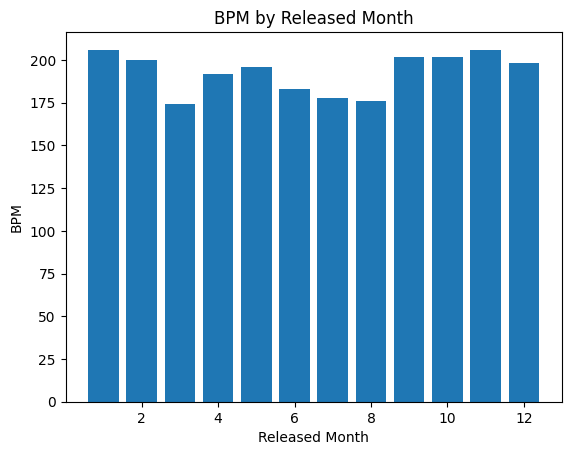

In [47]:
months_df.groupby('released_month')[['bpm', 'mode', 'streams']].mean()
plt.bar(months_df['released_month'], months_df['bpm'])
plt.xlabel('Released Month')
plt.ylabel('BPM')
plt.title('BPM by Released Month')
plt.show()

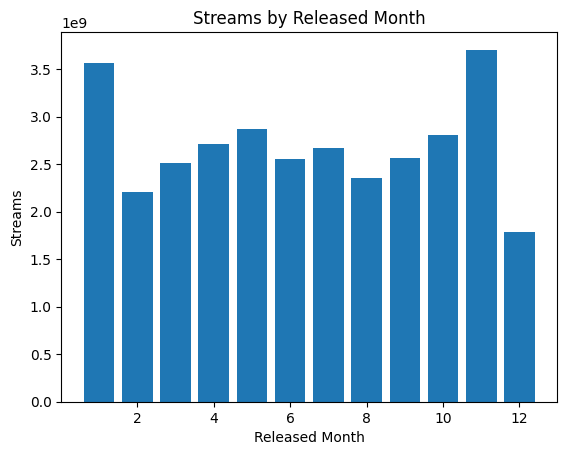

In [48]:
plt.bar(months_df['released_month'], months_df['streams'])
plt.xlabel('Released Month')
plt.ylabel('Streams')
plt.title('Streams by Released Month')
plt.show()

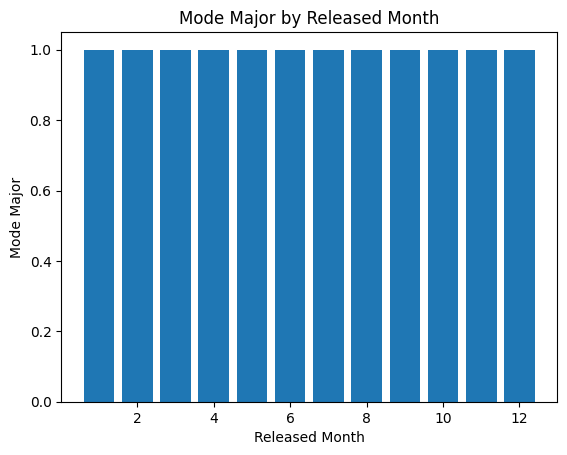

In [67]:
plt.bar(new_months_df['released_month'], new_months_df['mode_Major'])
plt.xlabel('Released Month')
plt.ylabel('Mode Major')
plt.title('Mode Major by Released Month')
plt.show()